<a href="https://colab.research.google.com/github/machine-learning-airu-ozone/ChE_Utah_AirQuality_ML_Ozone/blob/master/Google_Colab_Jupyter_Notebooks/Neural_Network_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Neural Network Notebook Template
## Summer 2019-Air U Project 
### Timothy Quah

This template is an example of how to train neural networks on Google Colab. Google Colab has free GPU/TPU resources that can help train neural networks that deal with large datasets

###  Load Data into Google Colab

First thing we must do is to load our data into the Google Colab environment. To do this we must do the following:
First we need to mount the drive which we use the following lines to do. There are ways to automate this process, but I am honestly a bit too lazy to do this.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The next step we will do is to verify that the path exist to our files that we have stored on google drive. 

In [0]:
import os
import_data_path = '/content/drive/My Drive/AirQuality_Research/Remove_Params_Upload_GoogleDrive/SWD/'


print('Does Data Path? '+str(os.path.exists(import_data_path)))


Does Data Path? True


Next we need to clone our repository and then load it into this notebook

In [0]:
Repository_Path = '/content/drive/My Drive/AirQuality_Research/Repository'
print('Does Repo Path? '+str(os.path.exists(Repository_Path)))
os.chdir(Repository_Path)


if len(os.listdir('/content/drive/My Drive/AirQuality_Research/Repository'))>0:
  !rm -r *
  print('Old Repository Deleted')
  
! git clone https://github.com/machine-learning-airu-ozone/ChE_Utah_AirQuality_ML_Ozone
import_script_path = '/content/drive/My Drive/AirQuality_Research/Repository/ChE_Utah_AirQuality_ML_Ozone/Functions'
print('Does Function Path? '+str(os.path.exists(import_script_path)))

Does Repo Path? True
Old Repository Deleted
Cloning into 'ChE_Utah_AirQuality_ML_Ozone'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 43 (delta 10), reused 28 (delta 3), pack-reused 0
Unpacking objects: 100% (43/43), done.
Does Function Path? True


Next we import all the packages we need. If you need a specific version it is possible, but will take an extra line: example  !pip install seaborn==0.9.0


In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras.optimizers as optimizers
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import random
from copy import deepcopy
from keras import backend as K
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


Now we need to load some scripts from our custom made functions into the enviroment

In [0]:
os.chdir(import_script_path)
from Trainer_Functions import r2_keras,model_neural_network,load_evaluate_neural_net,norm_divider,divider_XY,mse,r2


Next we need to just make sure to close all plots and just in case we have set random seeds


In [0]:
plt.close('all')
random.seed(7)
np.random.seed(7)
load_data_list = os.listdir(import_data_path)
print(load_data_list)

['outsider_data.csv', 'train_validate_data.csv']


We see in this case we have two files one called 'All_Data_norm.csv' we will load both files (including 'train_validate_data.csv') now

In [0]:
i = 1
full_path = os.path.join(import_data_path,load_data_list[i])
df = pd.read_csv(full_path)
header =list(df) 


Now we need to divide the training data from the validation data as well as inputs from outputs. In this case we will set up 70% training and 30% Validation.


---



In [0]:
header_num = len(header)
Full_List = list(np.arange(0,header_num-1+1e-6,1,dtype=int))
Y_Loc =  header.index('O3 Value')
Y_header_list = []
Y_header_list.append(Y_Loc)
X_header_list = list(set(Full_List)-set(Y_header_list))

data_array = np.array(df)
train_list,valid_list = norm_divider(data_array)
X,Y,X_valid,Y_valid = divider_XY(X_header_list,Y_header_list,data_array,train_list,valid_list)

Now we need to specify the neural network archetecture (layers (how deep) and nodes (how wide)), the learning rate (how aggressive the optimizer is),  how long to train, and batch sizes. Finally we want to use the validation data to evaluate the neural network.


W0816 03:28:04.930609 140453269510016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0816 03:28:04.966080 140453269510016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0816 03:28:04.974092 140453269510016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0816 03:28:04.991595 140453269510016 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0816 03:28:05.005885 

Text(0.5, 0, 'epoch')

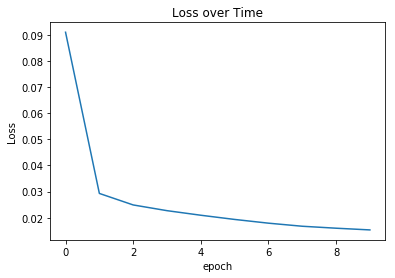

In [0]:
layer = 1
nodes = 10
learning_rate = 0.044
epochs = 10
batchsize = 32
droprate = 0.189
input_dim_ = len(X_header_list)
output_dim_ = len(Y_header_list)
model = model_neural_network(layer,nodes,input_dim_,output_dim_,DropPercent = droprate)
optimizers.Adam(lr=learning_rate)
model.compile(loss='mean_squared_error',optimizer="adam", metrics=[r2_keras])
history = model.fit(x=X, y = Y, nb_epoch=epochs, batch_size=batchsize,verbose = 0)
Y_pred = model.predict(X_valid)
plt.figure()
plt.plot(history.history['loss'])
plt.title('Loss over Time')
plt.ylabel('Loss')
plt.xlabel('epoch')


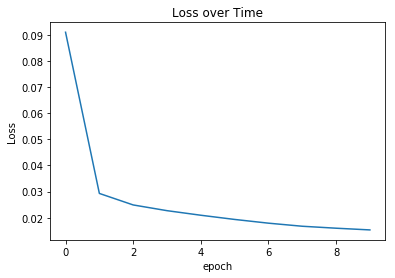

In [0]:
fig = plt.figure()
plt.plot(history.history['loss'])
plt.title('Loss over Time')
plt.ylabel('Loss')
plt.xlabel('epoch')

from google.colab import files
name = 'MSE_Training_history_optimize.jpg'
plt.savefig(name,dpi=300)
files.download(name)

Now we need to evaluate the neural network's performance using Mean Squared Error and R2

In [0]:
print('Mean Squared Error on Validation Data | MSE = %0.5f'%mse(Y_valid,Y_pred))
print('R2 Value | R2 = %0.3f'%r2(Y_valid,Y_pred))


Mean Squared Error on Validation Data | MSE = 0.01083
R2 Value | R2 = 0.804


Now lets plot our results

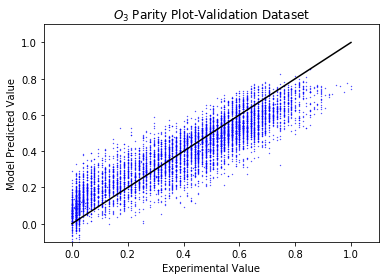

In [0]:
xy_parity = np.linspace(0,1,10)
fig = plt.figure()
plt.scatter(Y_valid,Y_pred,c = 'b',s = 0.1)
plt.plot(xy_parity,xy_parity,'k')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.xlabel('Experimental Value')
plt.ylabel('Model Predicted Value')
plt.title('$O_3$ Parity Plot-Validation Dataset')
from google.colab import files
name = 'MSE_O3_Parity_optimize.jpg'
plt.savefig(name,dpi=300)
files.download(name)

Now lets use the other dataset to see how our model is behaving if we don't use the sensor for training.

In [0]:
i = 0
full_path = os.path.join(import_data_path,load_data_list[i])
df_test = pd.read_csv(full_path)
data_array_test = np.array(df_test)
X_Other = data_array_test[:,X_header_list]
Y_Other = data_array_test[:,Y_header_list]
Y_other_pred = model.predict(X_Other)
print('Mean Squared Error on Validation Data | MSE = %0.5f'%mse(Y_Other,Y_other_pred))
print('R2 Value | R2 = %0.3f'%r2(Y_Other,Y_other_pred))

NameError: ignored

Again Lets plot our result

In [0]:
xy_parity = np.linspace(0,1,10)
fig = plt.figure()
plt.scatter(Y_Other,Y_other_pred,c = 'b',s = 0.1)
plt.plot(xy_parity,xy_parity,'k')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.xlabel('Experimental Value')
plt.ylabel('Model Predicted Value')
plt.title('$O_3$ Parity Plot-Other Dataset')
from google.colab import files
name = 'MSE_Other_Parity_optimize.jpg'
plt.savefig(name,dpi=300)
files.download(name)

In [0]:
model_name = 'optimal_nnet_node_mse_'+str(nodes)+'layer_'+str(layer)+'new.h5'

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()       
drive = GoogleDrive(gauth)
model.save(model_name)
model_file = drive.CreateFile({'title' : model_name})             
model_file.SetContentFile(model_name)                
model_file.Upload()
# download to google drive
drive.CreateFile({'id': model_file.get('id')})
from google.colab import files
files.download(model_name)